## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765


0:	learn: 0.9793830	total: 47.5ms	remaining: 47.5s
1:	learn: 0.9582303	total: 48.6ms	remaining: 24.2s
2:	learn: 0.9353695	total: 49.6ms	remaining: 16.5s
3:	learn: 0.9161608	total: 50.5ms	remaining: 12.6s
4:	learn: 0.8990488	total: 51.4ms	remaining: 10.2s
5:	learn: 0.8832373	total: 52.3ms	remaining: 8.66s
6:	learn: 0.8650817	total: 53.1ms	remaining: 7.54s
7:	learn: 0.8477194	total: 53.9ms	remaining: 6.69s
8:	learn: 0.8311338	total: 54.8ms	remaining: 6.03s
9:	learn: 0.8132347	total: 55.6ms	remaining: 5.51s
10:	learn: 0.7953546	total: 56.6ms	remaining: 5.08s
11:	learn: 0.7796915	total: 57.3ms	remaining: 4.72s
12:	learn: 0.7641617	total: 58.2ms	remaining: 4.42s
13:	learn: 0.7484061	total: 59ms	remaining: 4.15s
14:	learn: 0.7353909	total: 59.8ms	remaining: 3.93s
15:	learn: 0.7199546	total: 60.6ms	remaining: 3.73s
16:	learn: 0.7058790	total: 61.4ms	remaining: 3.55s
17:	learn: 0.6928959	total: 62.2ms	remaining: 3.39s
18:	learn: 0.6802797	total: 63.1ms	remaining: 3.26s
19:	learn: 0.6666222	tot

100:	learn: 0.2972990	total: 132ms	remaining: 1.18s
101:	learn: 0.2960462	total: 133ms	remaining: 1.17s
102:	learn: 0.2943930	total: 134ms	remaining: 1.17s
103:	learn: 0.2930965	total: 135ms	remaining: 1.16s
104:	learn: 0.2915568	total: 136ms	remaining: 1.16s
105:	learn: 0.2903968	total: 137ms	remaining: 1.15s
106:	learn: 0.2890244	total: 138ms	remaining: 1.15s
107:	learn: 0.2877824	total: 139ms	remaining: 1.15s
108:	learn: 0.2866076	total: 140ms	remaining: 1.14s
109:	learn: 0.2859470	total: 140ms	remaining: 1.14s
110:	learn: 0.2847736	total: 141ms	remaining: 1.13s
111:	learn: 0.2837297	total: 142ms	remaining: 1.13s
112:	learn: 0.2825964	total: 143ms	remaining: 1.12s
113:	learn: 0.2811402	total: 144ms	remaining: 1.12s
114:	learn: 0.2797104	total: 145ms	remaining: 1.11s
115:	learn: 0.2785930	total: 146ms	remaining: 1.11s
116:	learn: 0.2773867	total: 147ms	remaining: 1.11s
117:	learn: 0.2762157	total: 147ms	remaining: 1.1s
118:	learn: 0.2751476	total: 148ms	remaining: 1.1s
119:	learn: 0.

159:	learn: 0.2401391	total: 184ms	remaining: 964ms
160:	learn: 0.2396371	total: 185ms	remaining: 962ms
161:	learn: 0.2390494	total: 185ms	remaining: 959ms
162:	learn: 0.2387350	total: 186ms	remaining: 957ms
163:	learn: 0.2379292	total: 187ms	remaining: 954ms
164:	learn: 0.2372001	total: 188ms	remaining: 951ms
165:	learn: 0.2366878	total: 189ms	remaining: 949ms
166:	learn: 0.2363036	total: 190ms	remaining: 946ms
167:	learn: 0.2355500	total: 191ms	remaining: 944ms
168:	learn: 0.2349215	total: 192ms	remaining: 942ms
169:	learn: 0.2341849	total: 192ms	remaining: 940ms
170:	learn: 0.2335247	total: 193ms	remaining: 937ms
171:	learn: 0.2330065	total: 194ms	remaining: 935ms
172:	learn: 0.2326195	total: 195ms	remaining: 932ms
173:	learn: 0.2319223	total: 196ms	remaining: 930ms
174:	learn: 0.2313989	total: 197ms	remaining: 928ms
175:	learn: 0.2306230	total: 198ms	remaining: 926ms
176:	learn: 0.2299509	total: 199ms	remaining: 924ms
177:	learn: 0.2293964	total: 199ms	remaining: 921ms
178:	learn: 

261:	learn: 0.1875292	total: 271ms	remaining: 764ms
262:	learn: 0.1870113	total: 272ms	remaining: 763ms
263:	learn: 0.1865434	total: 273ms	remaining: 761ms
264:	learn: 0.1860849	total: 274ms	remaining: 760ms
265:	learn: 0.1859478	total: 275ms	remaining: 758ms
266:	learn: 0.1853456	total: 276ms	remaining: 757ms
267:	learn: 0.1850007	total: 276ms	remaining: 755ms
268:	learn: 0.1845694	total: 277ms	remaining: 753ms
269:	learn: 0.1840414	total: 278ms	remaining: 752ms
270:	learn: 0.1836199	total: 279ms	remaining: 750ms
271:	learn: 0.1832198	total: 280ms	remaining: 748ms
272:	learn: 0.1826792	total: 281ms	remaining: 747ms
273:	learn: 0.1824564	total: 281ms	remaining: 746ms
274:	learn: 0.1820491	total: 282ms	remaining: 744ms
275:	learn: 0.1816464	total: 283ms	remaining: 742ms
276:	learn: 0.1813464	total: 284ms	remaining: 741ms
277:	learn: 0.1810632	total: 285ms	remaining: 739ms
278:	learn: 0.1808467	total: 285ms	remaining: 738ms
279:	learn: 0.1804819	total: 286ms	remaining: 736ms
280:	learn: 

322:	learn: 0.1655860	total: 322ms	remaining: 676ms
323:	learn: 0.1651200	total: 324ms	remaining: 676ms
324:	learn: 0.1647142	total: 325ms	remaining: 675ms
325:	learn: 0.1645623	total: 326ms	remaining: 673ms
326:	learn: 0.1642024	total: 326ms	remaining: 672ms
327:	learn: 0.1638373	total: 327ms	remaining: 671ms
328:	learn: 0.1635890	total: 328ms	remaining: 669ms
329:	learn: 0.1632923	total: 329ms	remaining: 668ms
330:	learn: 0.1629712	total: 330ms	remaining: 667ms
331:	learn: 0.1624494	total: 331ms	remaining: 665ms
332:	learn: 0.1620981	total: 332ms	remaining: 664ms
333:	learn: 0.1618328	total: 332ms	remaining: 663ms
334:	learn: 0.1614792	total: 333ms	remaining: 661ms
335:	learn: 0.1611670	total: 334ms	remaining: 660ms
336:	learn: 0.1607130	total: 335ms	remaining: 659ms
337:	learn: 0.1604204	total: 336ms	remaining: 657ms
338:	learn: 0.1601258	total: 336ms	remaining: 656ms
339:	learn: 0.1598547	total: 337ms	remaining: 655ms
340:	learn: 0.1595338	total: 338ms	remaining: 653ms
341:	learn: 

425:	learn: 0.1388550	total: 409ms	remaining: 550ms
426:	learn: 0.1385804	total: 409ms	remaining: 550ms
427:	learn: 0.1383226	total: 410ms	remaining: 548ms
428:	learn: 0.1382481	total: 411ms	remaining: 547ms
429:	learn: 0.1381061	total: 412ms	remaining: 546ms
430:	learn: 0.1378797	total: 413ms	remaining: 545ms
431:	learn: 0.1376125	total: 414ms	remaining: 544ms
432:	learn: 0.1373761	total: 414ms	remaining: 543ms
433:	learn: 0.1370286	total: 415ms	remaining: 542ms
434:	learn: 0.1368676	total: 416ms	remaining: 540ms
435:	learn: 0.1367230	total: 417ms	remaining: 539ms
436:	learn: 0.1364168	total: 418ms	remaining: 538ms
437:	learn: 0.1362182	total: 419ms	remaining: 537ms
438:	learn: 0.1360213	total: 419ms	remaining: 536ms
439:	learn: 0.1359071	total: 420ms	remaining: 535ms
440:	learn: 0.1356568	total: 421ms	remaining: 534ms
441:	learn: 0.1353241	total: 422ms	remaining: 533ms
442:	learn: 0.1351545	total: 423ms	remaining: 531ms
443:	learn: 0.1349249	total: 423ms	remaining: 530ms
444:	learn: 

486:	learn: 0.1254128	total: 462ms	remaining: 486ms
487:	learn: 0.1253223	total: 463ms	remaining: 485ms
488:	learn: 0.1251908	total: 464ms	remaining: 484ms
489:	learn: 0.1251006	total: 464ms	remaining: 483ms
490:	learn: 0.1250088	total: 465ms	remaining: 482ms
491:	learn: 0.1247732	total: 466ms	remaining: 481ms
492:	learn: 0.1245630	total: 467ms	remaining: 480ms
493:	learn: 0.1243378	total: 468ms	remaining: 479ms
494:	learn: 0.1240792	total: 469ms	remaining: 478ms
495:	learn: 0.1238442	total: 470ms	remaining: 477ms
496:	learn: 0.1235879	total: 470ms	remaining: 476ms
497:	learn: 0.1234208	total: 471ms	remaining: 475ms
498:	learn: 0.1231217	total: 472ms	remaining: 474ms
499:	learn: 0.1229870	total: 473ms	remaining: 473ms
500:	learn: 0.1227567	total: 474ms	remaining: 472ms
501:	learn: 0.1226643	total: 475ms	remaining: 471ms
502:	learn: 0.1224801	total: 476ms	remaining: 470ms
503:	learn: 0.1223190	total: 476ms	remaining: 469ms
504:	learn: 0.1221077	total: 477ms	remaining: 468ms
505:	learn: 

588:	learn: 0.1085040	total: 547ms	remaining: 382ms
589:	learn: 0.1083450	total: 548ms	remaining: 381ms
590:	learn: 0.1080533	total: 549ms	remaining: 380ms
591:	learn: 0.1078578	total: 550ms	remaining: 379ms
592:	learn: 0.1077439	total: 551ms	remaining: 378ms
593:	learn: 0.1076261	total: 552ms	remaining: 377ms
594:	learn: 0.1074547	total: 553ms	remaining: 376ms
595:	learn: 0.1072754	total: 553ms	remaining: 375ms
596:	learn: 0.1071407	total: 554ms	remaining: 374ms
597:	learn: 0.1070094	total: 555ms	remaining: 373ms
598:	learn: 0.1068378	total: 556ms	remaining: 372ms
599:	learn: 0.1067240	total: 557ms	remaining: 371ms
600:	learn: 0.1066308	total: 558ms	remaining: 370ms
601:	learn: 0.1064834	total: 558ms	remaining: 369ms
602:	learn: 0.1063183	total: 559ms	remaining: 368ms
603:	learn: 0.1061908	total: 560ms	remaining: 367ms
604:	learn: 0.1060025	total: 561ms	remaining: 366ms
605:	learn: 0.1058657	total: 562ms	remaining: 365ms
606:	learn: 0.1057348	total: 563ms	remaining: 364ms
607:	learn: 

649:	learn: 0.0991658	total: 598ms	remaining: 322ms
650:	learn: 0.0990463	total: 599ms	remaining: 321ms
651:	learn: 0.0989367	total: 600ms	remaining: 320ms
652:	learn: 0.0988354	total: 601ms	remaining: 319ms
653:	learn: 0.0986840	total: 602ms	remaining: 318ms
654:	learn: 0.0985309	total: 603ms	remaining: 318ms
655:	learn: 0.0984249	total: 604ms	remaining: 317ms
656:	learn: 0.0982410	total: 605ms	remaining: 316ms
657:	learn: 0.0980422	total: 606ms	remaining: 315ms
658:	learn: 0.0979537	total: 607ms	remaining: 314ms
659:	learn: 0.0978566	total: 608ms	remaining: 313ms
660:	learn: 0.0977789	total: 608ms	remaining: 312ms
661:	learn: 0.0975704	total: 609ms	remaining: 311ms
662:	learn: 0.0973971	total: 610ms	remaining: 310ms
663:	learn: 0.0972629	total: 611ms	remaining: 309ms
664:	learn: 0.0971872	total: 612ms	remaining: 308ms
665:	learn: 0.0969158	total: 612ms	remaining: 307ms
666:	learn: 0.0967571	total: 613ms	remaining: 306ms
667:	learn: 0.0966064	total: 614ms	remaining: 305ms
668:	learn: 

745:	learn: 0.0864190	total: 683ms	remaining: 232ms
746:	learn: 0.0862436	total: 684ms	remaining: 232ms
747:	learn: 0.0860981	total: 684ms	remaining: 231ms
748:	learn: 0.0860167	total: 685ms	remaining: 230ms
749:	learn: 0.0859178	total: 686ms	remaining: 229ms
750:	learn: 0.0857943	total: 687ms	remaining: 228ms
751:	learn: 0.0856222	total: 688ms	remaining: 227ms
752:	learn: 0.0855645	total: 689ms	remaining: 226ms
753:	learn: 0.0854675	total: 689ms	remaining: 225ms
754:	learn: 0.0854359	total: 690ms	remaining: 224ms
755:	learn: 0.0853455	total: 691ms	remaining: 223ms
756:	learn: 0.0852547	total: 692ms	remaining: 222ms
757:	learn: 0.0851671	total: 693ms	remaining: 221ms
758:	learn: 0.0850702	total: 694ms	remaining: 220ms
759:	learn: 0.0849800	total: 694ms	remaining: 219ms
760:	learn: 0.0848933	total: 695ms	remaining: 218ms
761:	learn: 0.0846586	total: 696ms	remaining: 217ms
762:	learn: 0.0845349	total: 697ms	remaining: 216ms
763:	learn: 0.0844346	total: 698ms	remaining: 216ms
764:	learn: 

805:	learn: 0.0804313	total: 732ms	remaining: 176ms
806:	learn: 0.0802978	total: 733ms	remaining: 175ms
807:	learn: 0.0802387	total: 734ms	remaining: 174ms
808:	learn: 0.0801072	total: 735ms	remaining: 174ms
809:	learn: 0.0799547	total: 736ms	remaining: 173ms
810:	learn: 0.0798502	total: 737ms	remaining: 172ms
811:	learn: 0.0798206	total: 737ms	remaining: 171ms
812:	learn: 0.0797762	total: 738ms	remaining: 170ms
813:	learn: 0.0795790	total: 739ms	remaining: 169ms
814:	learn: 0.0794840	total: 740ms	remaining: 168ms
815:	learn: 0.0793834	total: 741ms	remaining: 167ms
816:	learn: 0.0793158	total: 742ms	remaining: 166ms
817:	learn: 0.0792219	total: 743ms	remaining: 165ms
818:	learn: 0.0790540	total: 743ms	remaining: 164ms
819:	learn: 0.0789521	total: 744ms	remaining: 163ms
820:	learn: 0.0788686	total: 745ms	remaining: 162ms
821:	learn: 0.0786589	total: 746ms	remaining: 162ms
822:	learn: 0.0785698	total: 747ms	remaining: 161ms
823:	learn: 0.0784177	total: 748ms	remaining: 160ms
824:	learn: 

906:	learn: 0.0709884	total: 818ms	remaining: 83.9ms
907:	learn: 0.0708467	total: 819ms	remaining: 83ms
908:	learn: 0.0707661	total: 820ms	remaining: 82.1ms
909:	learn: 0.0706521	total: 821ms	remaining: 81.2ms
910:	learn: 0.0706051	total: 822ms	remaining: 80.3ms
911:	learn: 0.0704923	total: 823ms	remaining: 79.4ms
912:	learn: 0.0704330	total: 824ms	remaining: 78.5ms
913:	learn: 0.0703179	total: 825ms	remaining: 77.6ms
914:	learn: 0.0702500	total: 826ms	remaining: 76.7ms
915:	learn: 0.0702212	total: 827ms	remaining: 75.8ms
916:	learn: 0.0700883	total: 827ms	remaining: 74.9ms
917:	learn: 0.0699883	total: 828ms	remaining: 74ms
918:	learn: 0.0699332	total: 829ms	remaining: 73.1ms
919:	learn: 0.0698475	total: 830ms	remaining: 72.2ms
920:	learn: 0.0697426	total: 831ms	remaining: 71.3ms
921:	learn: 0.0696181	total: 832ms	remaining: 70.4ms
922:	learn: 0.0694964	total: 833ms	remaining: 69.5ms
923:	learn: 0.0694349	total: 834ms	remaining: 68.6ms
924:	learn: 0.0693576	total: 834ms	remaining: 67.7

964:	learn: 0.0656477	total: 870ms	remaining: 31.6ms
965:	learn: 0.0655809	total: 871ms	remaining: 30.7ms
966:	learn: 0.0655116	total: 872ms	remaining: 29.8ms
967:	learn: 0.0654445	total: 873ms	remaining: 28.9ms
968:	learn: 0.0653442	total: 874ms	remaining: 28ms
969:	learn: 0.0652869	total: 875ms	remaining: 27.1ms
970:	learn: 0.0652557	total: 876ms	remaining: 26.2ms
971:	learn: 0.0652081	total: 877ms	remaining: 25.3ms
972:	learn: 0.0651396	total: 878ms	remaining: 24.4ms
973:	learn: 0.0651023	total: 879ms	remaining: 23.5ms
974:	learn: 0.0650096	total: 880ms	remaining: 22.6ms
975:	learn: 0.0649243	total: 880ms	remaining: 21.7ms
976:	learn: 0.0647928	total: 881ms	remaining: 20.7ms
977:	learn: 0.0647539	total: 882ms	remaining: 19.8ms
978:	learn: 0.0646302	total: 883ms	remaining: 18.9ms
979:	learn: 0.0645675	total: 884ms	remaining: 18ms
980:	learn: 0.0644549	total: 885ms	remaining: 17.1ms
981:	learn: 0.0643118	total: 886ms	remaining: 16.2ms
982:	learn: 0.0642510	total: 887ms	remaining: 15.3

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

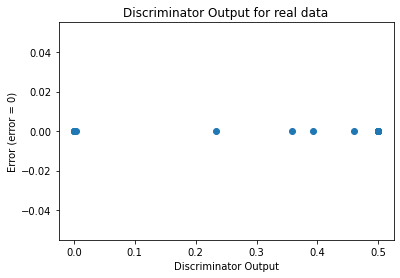

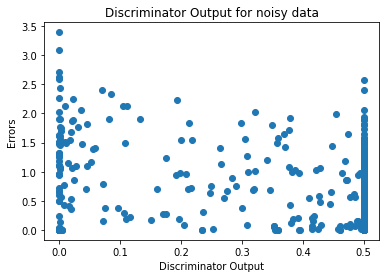

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

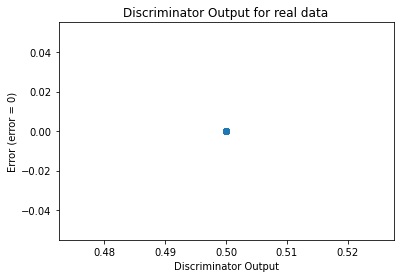

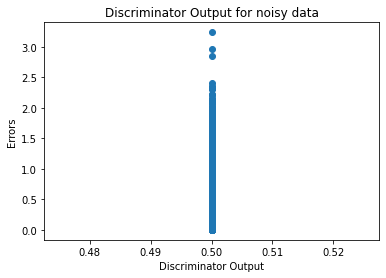

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0002]], device='cuda:0', requires_grad=True)
